# Data Visualization with Python II

Seaborn has a variety of charts, each one with a specific purpose. You can use these charts for both, exploration (exploring your data) and presentation (showing the data to others). 


In both cases, make sure your charts 

* have proper titles that explain what the chart shows (these titles can be long if necessary; don't use abbreviations), 
* have comparable axes scales if you make comparisons between charts, 
* the fonts are large enough to be clearly readable, 
* the labels are clearly visilbe, and 
* the chart conveys the message you are explaining in the text. 

In this notebook, we are going through some more charts and styling options and when they are useful. We will learn mor about charts and visualizations in the next lectures. 

More tutorials on Seaborn: https://seaborn.pydata.org/tutorial.html


## Charts: Violin plots

Violin plots show distributions for several quantitative variables in a data set for comparison. The below example shows a violin plot for ages of male and female passengers in the Titanic data st from the last notebook. It's the same data than in the previous example wherw we used histograms. 

Seaborn has two ways to creating violin plots
* `violinplot`: https://seaborn.pydata.org/generated/seaborn.violinplot.html
* `catplot`: https://seaborn.pydata.org/generated/seaborn.catplot.html

Both produce similar graphics. For simplicity, we use `catplot` here. The following line creates a violinplot (`kind`) for the dataframe `df` (`data`), showing `Sex` on the x-axis (`x`) and `Age` on the y-axis (`y`).

`sns.catplot(x='Sex', y='Age', data=df, kind='violin')`

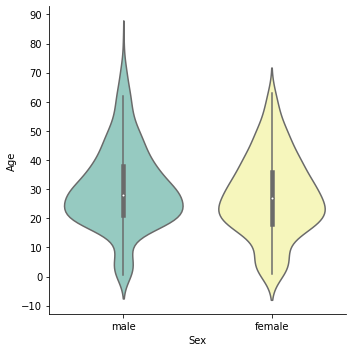

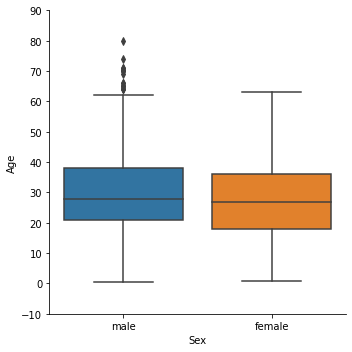

In [1]:
# library & dataset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('titanic.csv')
m_ysticks = np.arange(-10,100,10)

# plot
chart = sns.catplot(x='Sex', y='Age', data=df, kind='violin',palette='Set3')
plt.yticks(m_ysticks)
plt.tight_layout()
plt.show()

chart = sns.catplot(x='Sex', y='Age', data=df, kind='box')
plt.yticks(m_ysticks)
plt.tight_layout()
plt.show()

_1) What can you observe? Note down at least three observations:_

The following field used the markdown language (https://en.wikipedia.org/wiki/Markdown) used in Wikipedia. Create a bullet point list like so: 

* A higher 'Age' density between 20 and 30 for both male and female.
* Age and population in both of sex groups comply with normal distribution.
* More males than females slightly older.

_2) Can you create violin plots that show the different fares per passanger class?_ 

Set the y-axes to only positive values. Play around with the largest value on the y-axes to explore your data. Create one plot for each max value on the y-axis: 1000, 500, 100 and create one chart for each value.

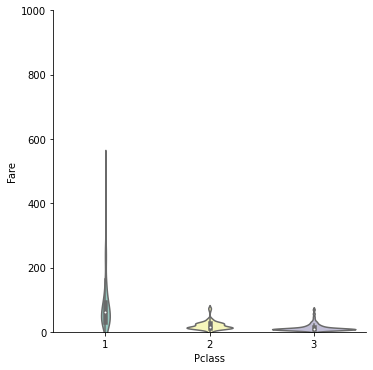

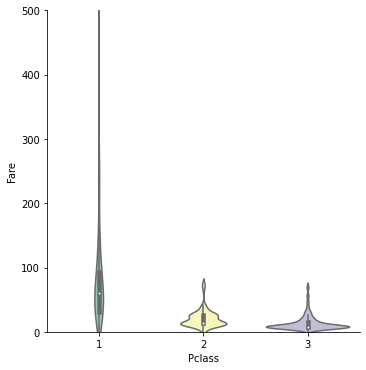

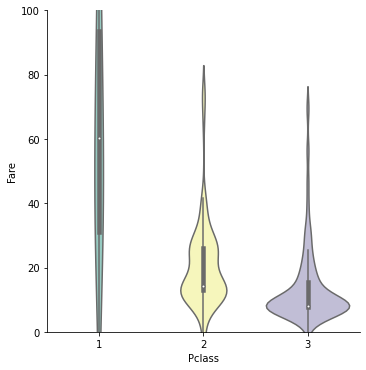

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


csvfile = pd.read_csv('titanic.csv')

chart = sns.catplot(x='Pclass', y='Fare', data=csvfile, kind='violin', palette='Set3')
plt.ylim(ymin=0,ymax=1000)
plt.show()

chart = sns.catplot(x='Pclass', y='Fare', data=csvfile, kind='violin', palette='Set3')
plt.ylim(ymin=0,ymax=500)
plt.show()

chart = sns.catplot(x='Pclass', y='Fare', data=csvfile, kind='violin', palette='Set3')
plt.ylim(ymin=0,ymax=100)
plt.show()

What can you tell about the data and distributions? Write down 3 observations. 


* Fare of First Pclass > Secomd > Third
* Largest share of customers of First Pclass < Second <Third
* Second Pclass: Evenly distributed in terms of 'Fare'
  Third Pclass: Most concentrated population distribution
  First Pclass: Largest consumption level

## Barplot with error bars

Barplots are some of the most common chart types and are widely used in scientific publications to show differences between conditions in a study. While violin plots and histograms show you about the distribution of data, the barplot tells you about:

* the mean or a data field, and 
* its uncertainty as the size of the confidence intervals (see slides).

Both are imporant in communication and can be the result of an in-depth data analysis. While the distribution helps you to figure out the noise in the data and to generate hypthesis about the data, barplots are usually the final charts you show to prove your hypotheses and claims.

https://seaborn.pydata.org/generated/seaborn.barplot.html

The below code shows a barplot that represents the means for the 'Age' data---shown in the above violine plot: 

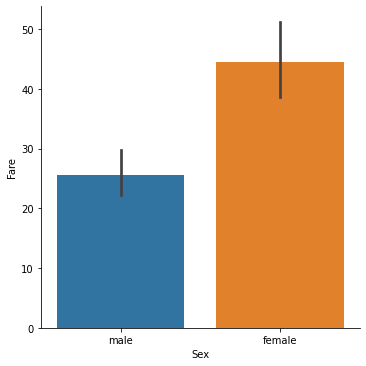

In [3]:
sns.catplot(x='Sex', y='Fare', data=df, kind='bar')  
plt.show()

What do you observe about the confidence intervals? 

#TODO


2) Can you create barplots for some other data?


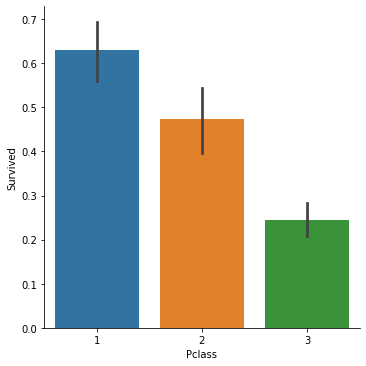

In [5]:
sns.catplot(x='Pclass', y='Survived', data=df, kind='bar')
plt.show()


Again, what can you see? Note down some observations below (again, using markdown)

* The likelyhood of surviving was highest in 1st class. 
* The lower the classess, the lower the rate of survival. 
* Differences between classes are significant.

## Scatterplot

The above plots (barplot, violinplot) were good to show differences in numerical variables (Age, Fare) across categorical variables (Sex, PClass, Survived). 

The below example shows two dimensions: `tip` and `total_bill` from the 'tips' data set.  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

df_tips = sns.load_dataset('tips')

sns.lmplot( x="tip", y="total_bill", data=df_tips, fit_reg=False, hue='sex', legend=True, palette="Set1")


plt.show()

_3) Can you plot `Age` against `Fare` in our titanic dataset, with the hue of dots mapped to whether they survived or not?_ 

Again, correct the axis if nessary and add a title to the chart.

<bound method Figure.show of <Figure size 411.875x360 with 1 Axes>>

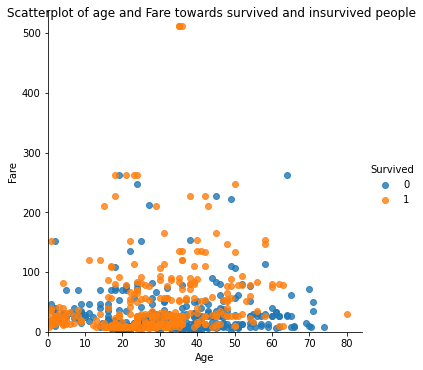

In [15]:
chart = sns.lmplot(data=df, x="Age", y="Fare", fit_reg=False, hue='Survived')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.tight_layout
# plt.show()
fig = chart.fig
fig.suptitle('Scatterplot of age and Fare towards survived and insurvived people', fontsize=12)
fig.show

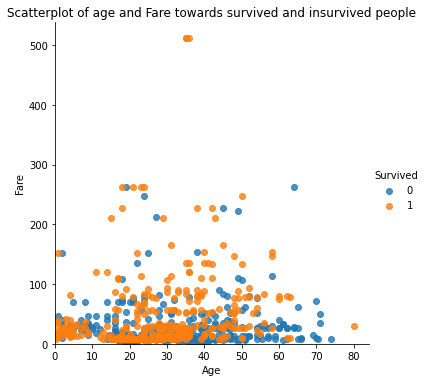

In [18]:
chart = sns.lmplot(data=df, x="Age", y="Fare", fit_reg=False, hue='Survived')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.tight_layout

ax = plt.gca()
ax.set_title('Scatterplot of age and Fare towards survived and insurvived people', fontsize=12)

plt.show()

What can you see? Note down some observations:

* many of people who paid more fare have higher possibility of surviving
* Customer are concentrated below y-axis 100, namely lower fare sector
* Lower age, higher survived possibility.

## Parallel Coordinates Plot (PCP)

Scatterplots are neat when you have two numerical variables (e.g., Age, Fare) and perhaps one nominal (e.g, Sex, Survived). However, there are many data sets that have much more numerical variables. 

A PCP is created like so:

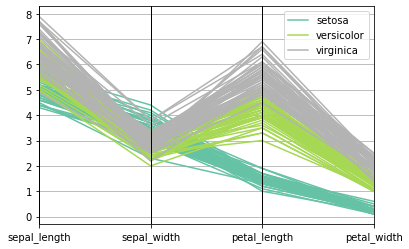

In [24]:
# libraries
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
 
# Take the iris dataset
import seaborn as sns
data = sns.load_dataset('iris')
 
# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"))
plt.show()


What can you observe? Note down some observations?

* Petal of 'setosa' is circle-likely and for 'virginca' is elongated.
* for 'setosa', petal is much smaller than sepal compared to other two types.
* length of sepal often is the biggest while width of pedal is the smallest in these four items.

## Congrats

Since you made it until here, explore https://python-graph-gallery.com and create some plots for the titanic or iris dataset. 

## Styling Charts

This last part of the excercises is abot styling. Remember what has been said about the data-ink ratio and readability in the lecture. 

As you might have seen, the default figures produced by python are not optimally. Yet, there are many references and tutorials on how to style (e.g. color pallets) and optimzie (e.g. label size, background, tickmarks, legends) the charts. 

Your final assignment for this tutorial is familiarize yourself with the ways Seaborn allows modifying chart appearance and try them out on the charts in this notebook. 

Resources: 
* https://seaborn.pydata.org/tutorial/aesthetics.html
* https://seaborn.pydata.org/tutorial/color_palettes.html

Also check this refernce for tips and tricks in styling charts.
* http://www.storytellingwithdata.com

# Additional visualiztion tools

Once you're fine with python, you will find visualiztion in python is limited. Check out the tools listed here https://github.com/benjbach/vishub/wiki/Visualization-Tools

Chose one and create some visualizations for some dataset of your choice: 
https://github.com/benjbach/vishub/wiki/Open-Data-Sets




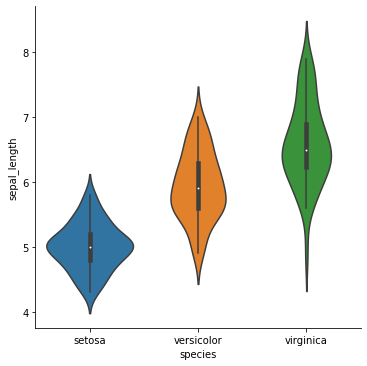

In [30]:
sns.catplot(x='species',y='sepal_length',data=data,kind='violin')

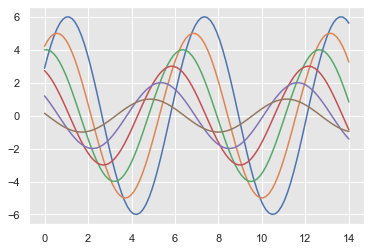

In [49]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()



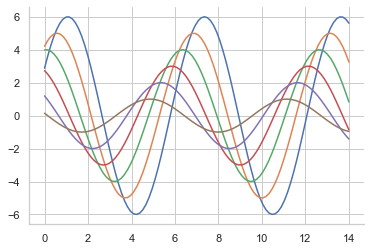

In [53]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sns.set_style("whitegrid")
sinplot()
sns.despine() # layback than drawing out "sinplot()
